<a href="https://colab.research.google.com/github/Rohitdaddekar/Car_Damage_Classifier/blob/main/Car_Damage_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load dataset from the Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = 'drive/My Drive/Colab Notebooks/Carscan/damage_classifier'

In [ ]:
import cv2
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras
#!pip install tensorflow==2.7.0
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
# train_data = ''../drive/MyDrive/Colab Notebooks/Carscan/damage_classifier/training''
# test_data =  '../drive/MyDrive/Colab Notebooks/Carscan/damage_classifier/validation'

In [ ]:
# train_data

Read some of the images from the dataset

size of image (h x w) 183 275


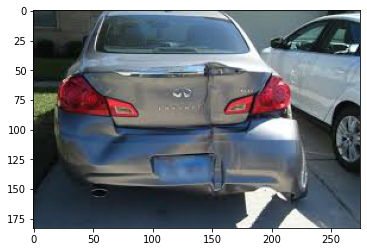

In [ ]:
img = plt.imread("/content/drive/MyDrive/Colab Notebooks/Carscan/damage_classifier/training/00-damage/0006.JPEG")
plt.imshow(img)
height, width, dim = img.shape
print("size of image (h x w)",height,width)

size of image (h x w) 183 275


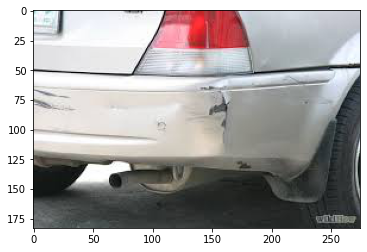

In [ ]:
img = plt.imread("/content/drive/MyDrive/Colab Notebooks/Carscan/damage_classifier/training/00-damage/0025.JPEG")
plt.imshow(img)
height, width, dim = img.shape
print("size of image (h x w)",height,width)

Data Transformation

Resize the images into(150,150)becuase the given images in the dataset having different sizes.

In [ ]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Carscan/damage_classifier/training',
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')

test_dataset = test.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Carscan/damage_classifier/validation',
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


In [ ]:
test_dataset.class_indices

{'00-damage': 0, '01-whole': 1}

Model Building

This is an binary classification type problem where we need to predict whether the car is damage or not.

So here i am using CNN model for binary classification.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout, Conv2D, MaxPool2D
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# using CNN 
model = Sequential()

# Convolutional layer and maxpool layer 1
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer and Rectified Linear Unit activation function 
model.add(Dense(512,activation='relu'))

# Output layer with single neuron
# Using sigmoid so as our model output is between 0 and 1
# with 0 - damage car & 1 - not damage car
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

Training the Model

In [ ]:
#Training Model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1, min_delta=0.001)
modelcheck = ModelCheckpoint('best_model.hdf5', monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')

In [ ]:
history = model.fit(train_dataset, 
                    validation_data=test_dataset,
                    epochs=20,
                    callbacks=[earlystop,modelcheck],
                    batch_size=32)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
58/58 [==============================] - ETA: 0s - loss: 0.6651 - accuracy: 0.6212 WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f3029681950> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the

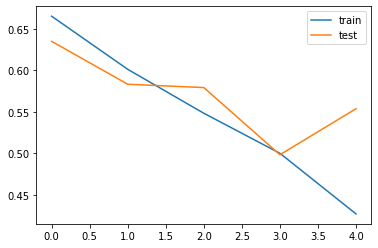

In [ ]:
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test') 
plt.legend()
plt.show()

In [ ]:
print('Test accuracy achieved', history.history['val_accuracy'][-2])

Test accuracy achieved 0.7630434632301331


Making Predication

In [ ]:
# Our predict function
def predictImage(filename):
    
    img = image.load_img(filename,target_size=(150,150))
    plt.imshow(img)
    
    Y = image.img_to_array(img)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val < 0.5:
        plt.xlabel("Car Damage",fontsize=20)
    elif val >= 0.5:
        plt.xlabel("Car Not Damage",fontsize=20)

[[1.]]


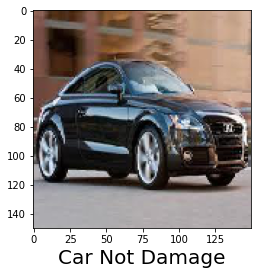

In [ ]:
predictImage('/content/drive/MyDrive/Colab Notebooks/Carscan/damage_classifier/validation/01-whole/0025.jpg')

[[0.]]


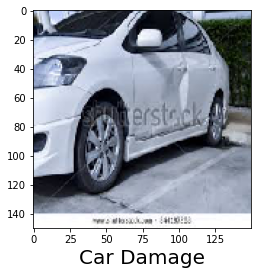

In [ ]:
predictImage('/content/drive/MyDrive/Colab Notebooks/Carscan/damage_classifier/validation/00-damage/0024.JPEG')